## Housing price prediction

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data
analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV
file below.The company is looking at prospective properties to buy to enter the market. You are required to build 
a regression model using regularisation in order to predict the actual value of the prospective properties and 
decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be 
used by the management to understand how exactly the prices vary with the variables. They can accordingly 
manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will
be a good way for management to understand the pricing dynamics of a new market.

In [610]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [611]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## Step 1: Reading and Understanding the Data


In [612]:
#load data

data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data  Inspection

In [613]:
data.shape

(1460, 81)

In [614]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [615]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Data Cleaning and Manipulation


In [616]:
#check that is there any duplicate columns
data[data.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


No duplicate columns

In [617]:
#null value percentage for columns
missing_precentage = round(100*(data.isnull().sum()/len(data.index)), 2)
missing_df_sorted = missing_precentage[missing_precentage!=0.00].sort_values(missing_precentage[1], ascending=False)
missing_df_sorted

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType      5.55 
GarageYrBlt     5.55 
GarageFinish    5.55 
GarageQual      5.55 
GarageCond      5.55 
BsmtExposure    2.60 
BsmtFinType2    2.60 
BsmtFinType1    2.53 
BsmtCond        2.53 
BsmtQual        2.53 
MasVnrArea      0.55 
MasVnrType      0.55 
Electrical      0.07 
dtype: float64

In [618]:
# drop the column that more than 80% null values
data = data.drop('PoolQC', 1)
data = data.drop('MiscFeature', 1)
data = data.drop('Alley', 1)
data = data.drop('Fence', 1)

In [619]:
#all the null value columns are categorical
#since the meaning of null value is the absence of feature w.r.t data dictionary, replacing all the null value with 'None'

categorical_null_cols = ['FireplaceQu', 'GarageType','GarageFinish', 'GarageQual','GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',  'MasVnrType', 'Electrical']
for column in categorical_null_cols:
    data[column]=data[column].fillna('None')

In [620]:
missing_precentage = round(100*(data.isnull().sum()/len(data.index)), 2)
missing_df_sorted = missing_precentage[missing_precentage!=0.00].sort_values(missing_precentage[1], ascending=False)
missing_df_sorted

LotFrontage    17.74
GarageYrBlt    5.55 
MasVnrArea     0.55 
dtype: float64

In [621]:
#for LotFrontage and MasVnrArea null value hadling by impute median
data['LotFrontage'] = data['LotFrontage'].replace(np.nan, data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan, data['MasVnrArea'].median())

#for GarageYrBlt null value setting to 0
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)

- All the null values are handled now


##### Remove categorical column data that having more than 80% data to a specific value.


In [622]:
#removing column having more than 80% frequent same value
removed_cols = []
for col in data.select_dtypes(include=['object']):
    value_freq = (data[col].value_counts()/data[col].count())*100
    if(value_freq[0]>80):
        data = data.drop(col, 1)
        removed_cols.append(col)
print('Removed columns are :')        
removed_cols    

Removed columns are :


['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [623]:
data.shape


(1460, 57)

### Outlier handling

In [624]:
## outliers
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
10%,146.900000,20.000000,49.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1928.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
98%,1430.820000,188.200000,120.

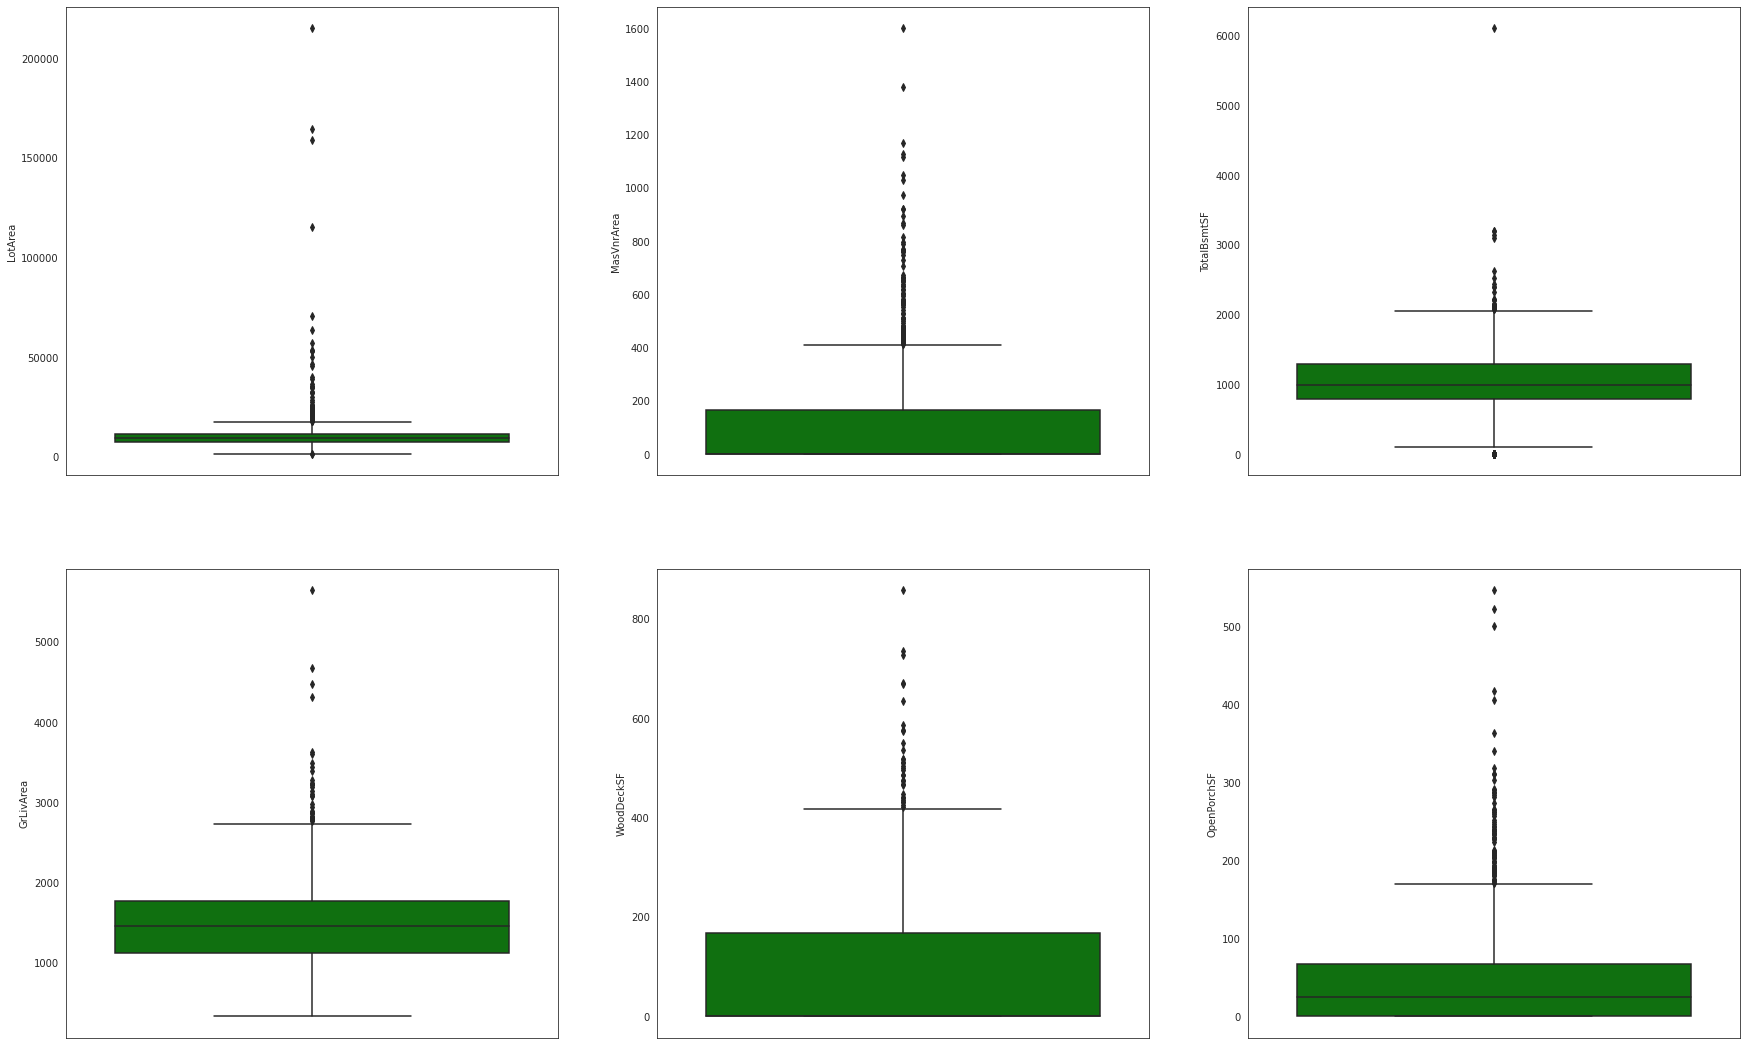

In [625]:
# checking outliers of numerical variable using box-plot

plt.figure(figsize=(30, 50))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', color='g', data = data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', color='g', data = data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', color='g', data = data)
plt.subplot(5,3,4)
sns.boxplot(y = 'GrLivArea', color='g', data = data)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', color='g', data = data)
plt.subplot(5,3,6)
sns.boxplot(y = 'OpenPorchSF', color='g', data = data)


plt.show()

In [626]:
data.shape

(1460, 57)

In [627]:
##Removing the Outliers

# Removing values beyond 99% for all the numerical columns
outliers_LotArea = data['LotArea'].quantile(0.99)
data = data[data["LotArea"] < outliers_LotArea]

outliers_TotalBsmtSF = data['TotalBsmtSF'].quantile(0.99)
data = data[data["TotalBsmtSF"] < outliers_TotalBsmtSF]

outliers_WoodDeckSF = data['WoodDeckSF'].quantile(0.99)
data = data[data["WoodDeckSF"] < outliers_WoodDeckSF]

outliers_OpenPorchSF = data['OpenPorchSF'].quantile(0.99)
data = data[data["OpenPorchSF"] < outliers_OpenPorchSF]

In [628]:
data.shape

(1400, 57)

<AxesSubplot:>

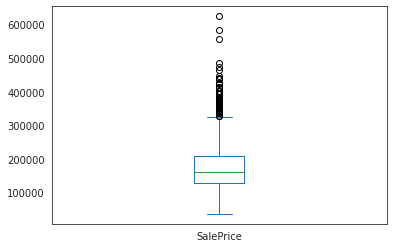

In [629]:
data['SalePrice'].plot.box()

In [630]:
outliers_SalePrice = data['SalePrice'].quantile(0.99)
data = data[data["SalePrice"] < outliers_SalePrice]

In [631]:
data.shape

(1386, 57)

In [632]:
##Removing 'Id' because it has no significance in analysis
data = data.drop(['Id'], axis=1)

In [633]:
##Removing 'YrSold' and 'MoSold' because it has no significance in analysis
data = data.drop(['MoSold','YrSold'], axis=1)

In [634]:
##Removing 'YearBuilt' and 'YearRemodAdd' because it has no significance in analysis
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis=1)

In [635]:
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,RFn,2,548,0,61,0,0,0,0,0,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,0,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,0,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,0,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,0,250000
5,50,RL,85.0,14115,IR1,Inside,Mitchel,1.5Fin,5,5,Gable,VinylSd,VinylSd,None,0.0,TA,Wood,Gd,No,GLQ,732,0,64,796,Ex,796,566,0,1362,1,0,1,1,1,1,TA,5,0,None,Attchd,Unf,2,480,40,30,0,320,0,0,700,143000
6,20,RL,75.0,10084,Reg,Inside,Somerst,1Story,8,5,Gable,VinylSd,VinylSd,Stone,186.0,Gd,PConc,Ex,Av,GLQ,1369,0,317,1686,Ex,1694,0,0,1694,1,0,2,0,3,1,Gd,7,1,Gd,Attchd,RFn,2,636,255,57,0,0,0,0,0,307000
7,60,RL,69.0,10382,IR1,Corner,NWAmes,2Story,7,6,Gable,HdBoard,HdBoard,Stone,240.0,TA,CBlock,Gd,Mn,ALQ,859,32,216,1107,Ex,1107,983,0,2090,1,0,2,1,3,1,TA,7,2,TA,Attchd,RFn,2,484,235,204,228,0,0,0,350,200000
8,50,RM,51.0,6120,Reg,Inside,OldTown,1.5Fin,7,5,Gable,BrkFace,Wd Shng,None,0.0,TA,BrkTil,TA,No,Unf,0,0,952,952,Gd,1022,752,0,1774,0,0,2,0,2,2,TA,8,2,TA,Detchd,Unf,2,468,90,0,205,0,0,0,0,129900
9,190,RL,50.0,7420,Reg,Corner,BrkSide,1.5Unf,5,6,Gable,MetalSd,MetalSd,None,0.0,TA,BrkTil,TA,No,GLQ,851,0,140,991,Ex,1077,0,0,1077,1,0,1,0,2,2,TA,5,2,TA,Attchd,RFn,1,205,0,4,0,0,0,0,0,118000


## Step 3: Data Visualisation


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

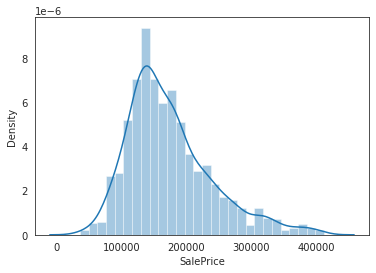

In [636]:
#count distribution
sns.distplot(data.SalePrice)

<Figure size 720x360 with 0 Axes>

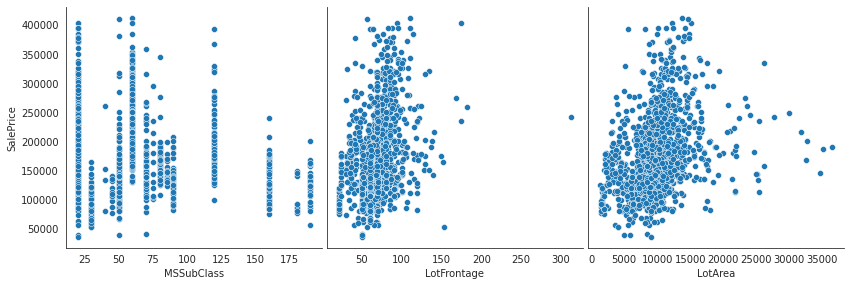

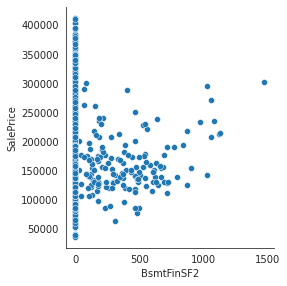

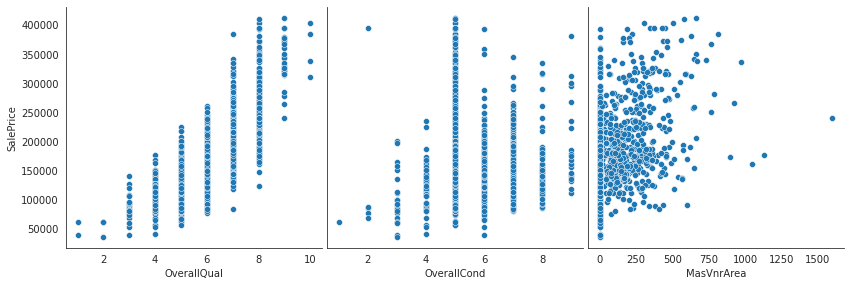

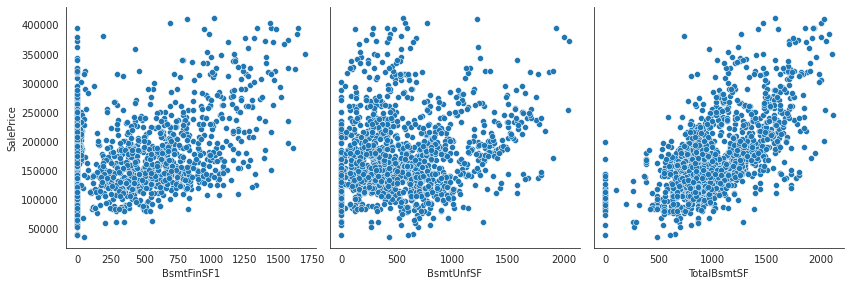

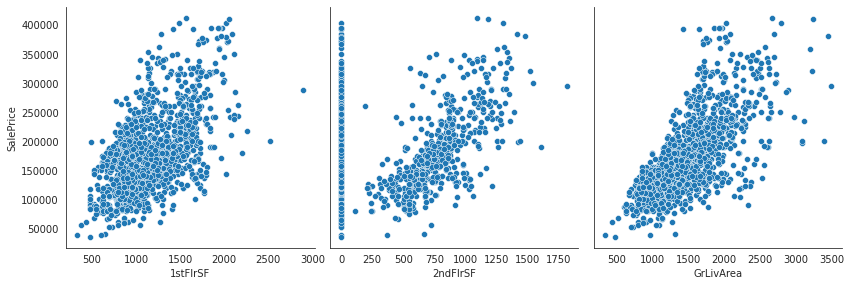

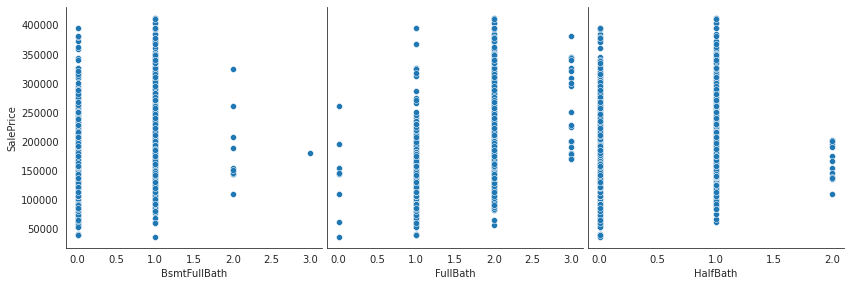

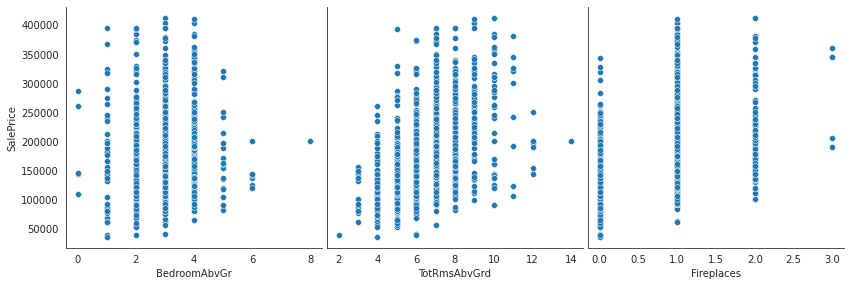

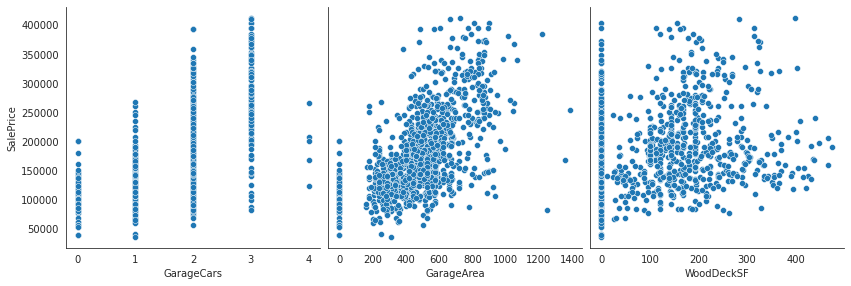

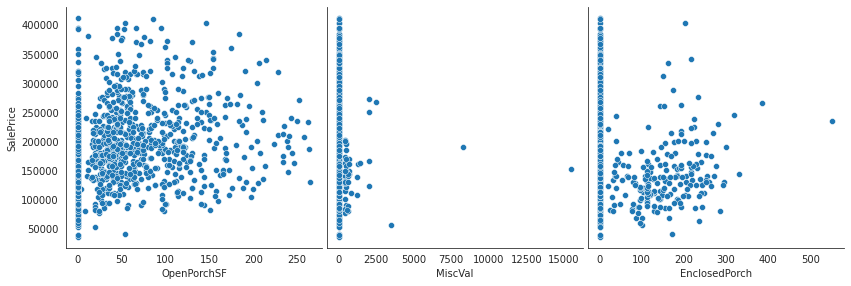

In [637]:
# numerical value pair plots

plt.figure(figsize=(10,5))
sns.pairplot(data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BsmtFinSF2'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(data, x_vars=['OpenPorchSF','MiscVal', 'EnclosedPorch'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

- 'BsmtFinSF1', 'BsmtUnfSF' -> thease vaiables showing some correlation
- '1stFlrSF','2ndFlrSF', 'GrLivArea' -> these three showing some correlation
-  Miscval , EnclosedPorch -> most of the values in zero
- Other varibales are showing some relationship. Can proceed these variables for further analysis

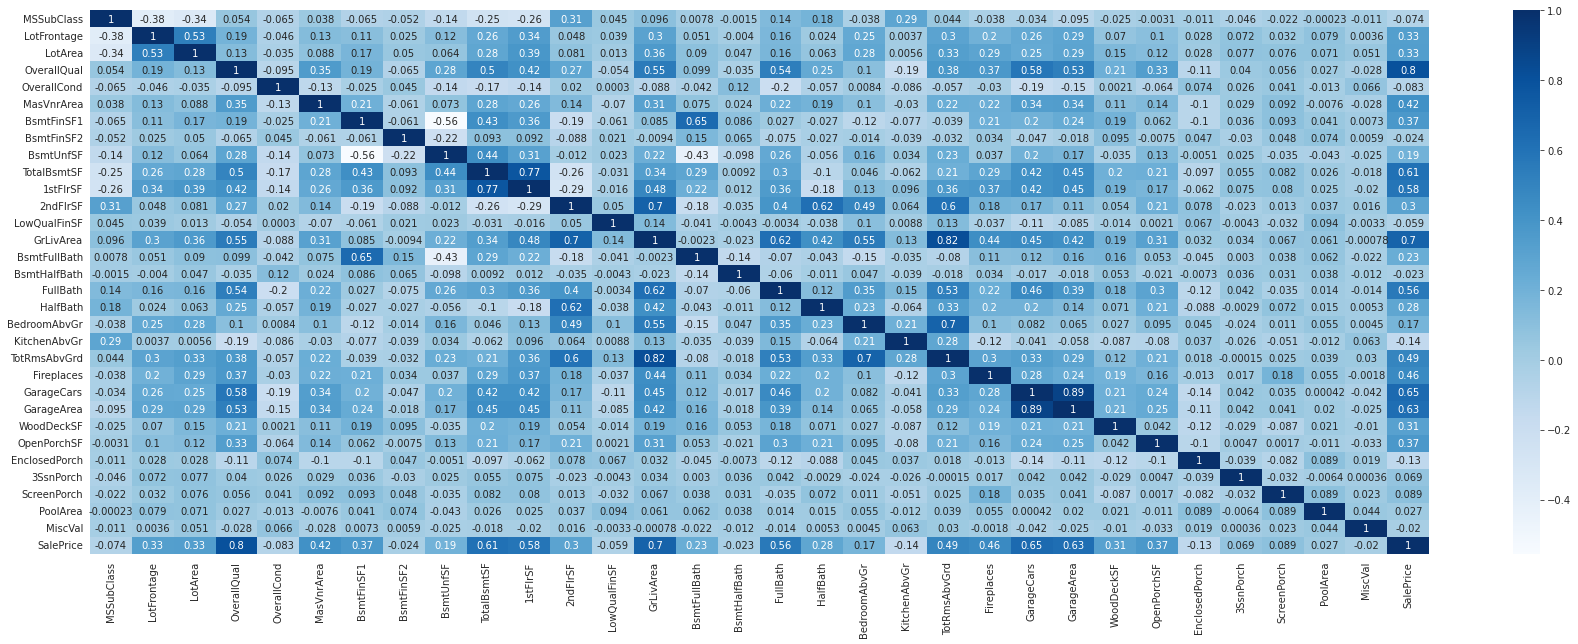

In [638]:
# Check correlation using heatmap

plt.figure(figsize = (30, 10))
sns.heatmap(data.corr(), annot = True, cmap="Blues")
plt.show()

In [639]:
data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
MSSubClass,1.000000,-0.380116,-0.342296,0.054324,-0.064950,0.038099,-0.065339,-0.052074,-0.138790,-0.248783,-0.259910,0.313949,0.045255,0.096477,0.007753,-0.001492,0.140004,0.184247,-0.037598,0.287167,0.044076,-0.038487,-0.034087,-0.095259,-0.024871,-0.003118,-0.011037,-0.045591,-0.022259,-0.000227,-0.010661,-0.074452
LotFrontage,-0.380116,1.000000,0.530611,0.186913,-0.045691,0.130664,0.109486,0.025368,0.117318,0.261583,0.344626,0.048308,0.038694,0.302830,0.051466,-0.004013,0.158493,0.024358,0.252539,0.003736,0.299670,0.198701,0.256964,0.288895,0.069880,0.103174,0.027735,0.071700,0.031876,0.079001,0.003580,0.329734
LotArea,-0.342296,0.530611,1.000000,0.126625,-0.034883,0.088059,0.170041,0.050152,0.063832,0.277058,0.385595,0.081343,0.012719,0.360429,0.089671,0.047283,0.161506,0.062863,0.276001,0.005584,0.328761,0.290196,0.249812,0.292048,0.146921,0.121559,0.027522,0.077231,0.075824,0.070958,0.051446,0.334104
OverallQual,0.054324,0.186913,0.126625,1.000000,-0.095436,0.350325,0.190775,-0.064994,0.283099,0.500062,0.418103,0.273936,-0.053617,0.552132,0.098653,-0.034541,0.535935,0.253476,0.101026,-0.185678,0.376253,0.373349,0.577825,0.527473,0.211022,0.333956,-0.107561,0.039631,0.055855,0.026917,-0.027633,0.803028
OverallCond,-0.064950,-0.045691,-0.034883,-0.095436,1.000000,-0.126959,-0.024535,0.044892,-0.144564,-0.171471,-0.143822,0.020417,0.000295,-0.087960,-0.041582,0.115366,-0.204941,-0.056953,0.008388,-0.086035,-0.057216,-0.029650,-0.188752,-0.149897,0.002082,-0.064349,0.074225,0.025704,0.040699,-0.012665,0.066414,-0.082954
MasVnrArea,0.038099,0.130664,0.088059,0.350325,-0.126959,1.000000,0.208107,-0.061132,0.072633,0.282935,0.261428,0.138411,-0.070335,0.311713,0.074699,0.023643,0.221335,0.190525,0.102821,-0.029781,0.222290,0.217974,0.335343,0.337751,0.111930,0.141146,-0.104256,0.029186,0.091777,-0.007573,-0.028174,0.417454
BsmtFinSF1,-0.065339,0.109486,0.170041,0.190775,-0.024535,0.208107,1.000000,-0.060583,-0.555788,0.433549,0.356208,-0.191011,-0.060915,0.084544,0.650198,0.085886,0.027126,-0.027057,-0.115015,-0.077407,-0.038780,0.214076,0.198716,0.240777,0.188624,0.061829,-0.101752,0.036456,0.092940,0.041454,0.007286,0.369642
BsmtFinSF2,-0.052074,0.025368,0.050152,-0.064994,0.044892,-0.061132,-0.060583,1.000000,-0.220337,0.093320,0.092116,-0.088051,0.021217,-0.009371,0.149497,0.064856,-0.075223,-0.027061,-0.013729,-0.039282,-0.031954,0.033729,-0.046915,-0.018271,0.094578,-0.007465,0.046513,-0.030039,0.048478,0.073922,0.005920,-0.023814
BsmtUnfSF,-0.138790,0.117318,0.063832,0.283099,-0.144564,0.072633,-0.555788,-0.220337,1.000000,0.435391,0.308448,-0.011526,0.023127,0.220279,-0.425446,-0.097906,0.263490,-0.056375,0.156261,0.033820,0.233690,0.037194,0.199243,0.170445,-0.034778,0.133678,-0.005134,0.024709,-0.034679,-0.043449,-0.024780,0.193475
TotalBsmtSF,-0.248783,0.261583,0.277058,0.500062,-0.171471,0.282935,0.433549,0.093320,0.435391,1.000000,0.772301,-0.256245,-0.031371,0.336538,0.286601,0.009182,0.296127,-0.104024,0.045901,-0.061873,0.208601,0.288099,0.421421,0.446256,0.204061,0.214929,-0.097278,0.055209,0.081513,0.026105,-0.017642,0.609865


#### Observations:
- Variables '1stFlrSF' and 'TotalBsmtSF' shows 78% positive correlation. Hence we can drop '1stFlrSF' 
- Variables 'GrLivArea' and 'TotRmsAbvGrd' shows 83%  positive correlation. Hence, dropping 'TotRmsAbvGrd'.
- Variables 'GarageCars' and 'GarageArea' shows 89%  positive correlation. Hence, dropping 'GarageArea'.
- Variables 'GrLivArea' and '2ndFlrSF' shows 71%  positive correlation. Hence, dropping '2ndFlrSF'.


In [640]:
#Removing the above highly correlated variables

data= data.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', '2ndFlrSF'], axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,0,1710,1,0,2,1,3,1,Gd,0,None,Attchd,RFn,2,0,61,0,0,0,0,0,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,0,1262,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,2,298,0,0,0,0,0,0,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,0,1786,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,2,0,42,0,0,0,0,0,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,0,1717,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,3,0,35,272,0,0,0,0,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,0,2198,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,3,192,84,0,0,0,0,0,250000


In [641]:
data.shape

(1386, 47)

In [642]:
obj_cols = data.columns[data.dtypes=='O']
obj_cols.to_list()

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

<Figure size 432x288 with 0 Axes>

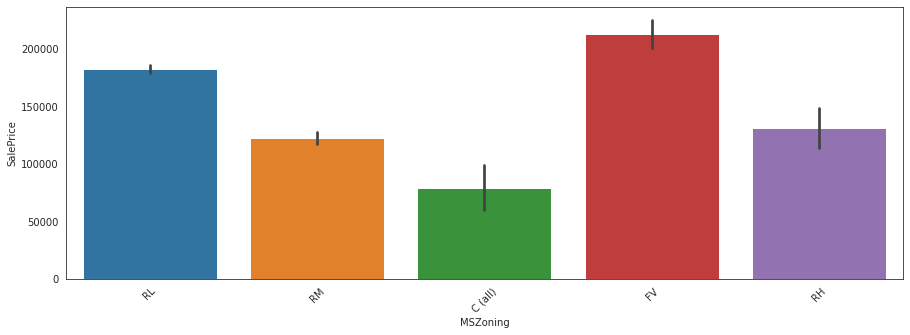

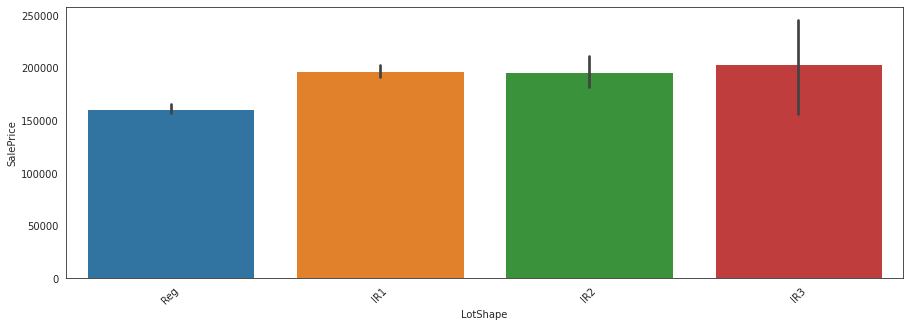

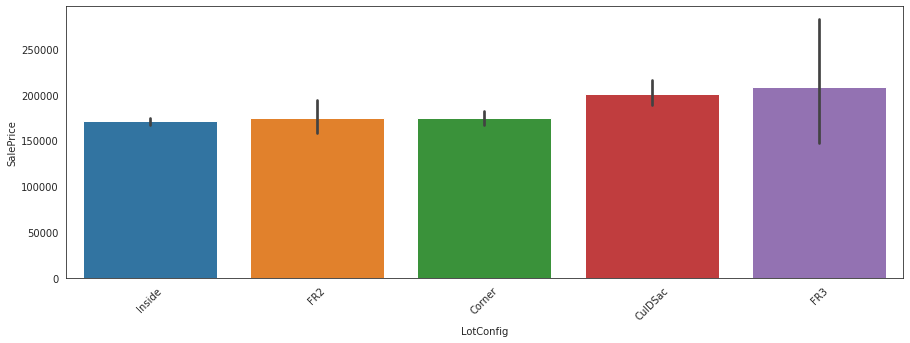

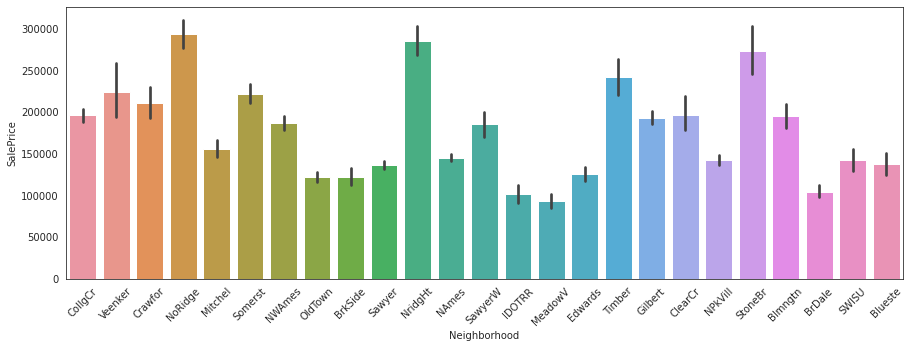

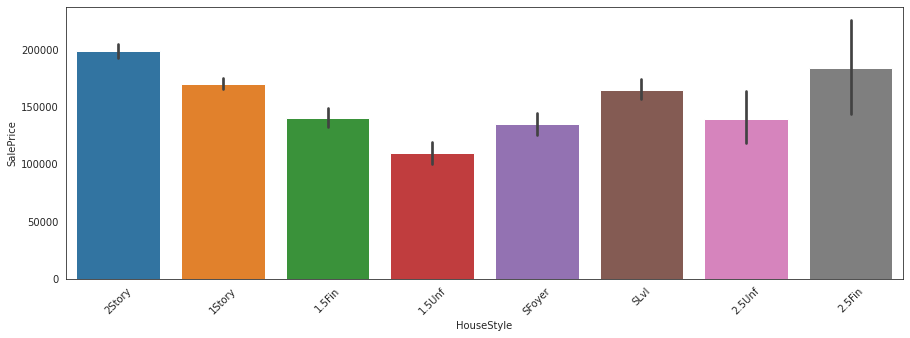

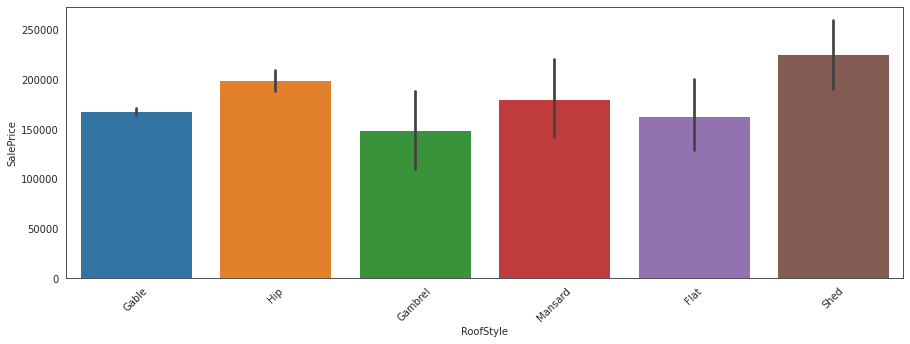

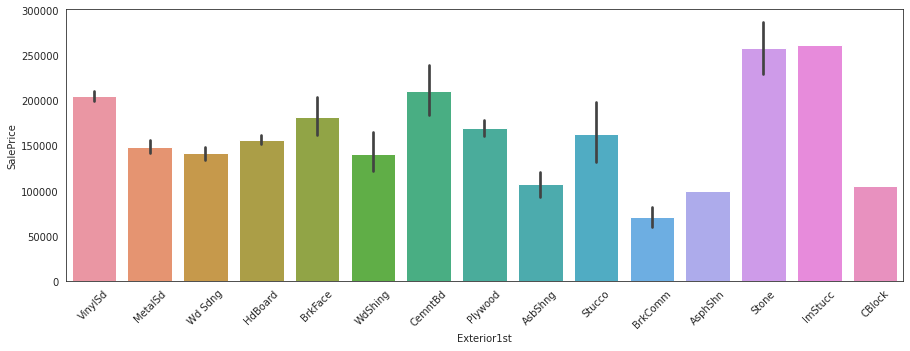

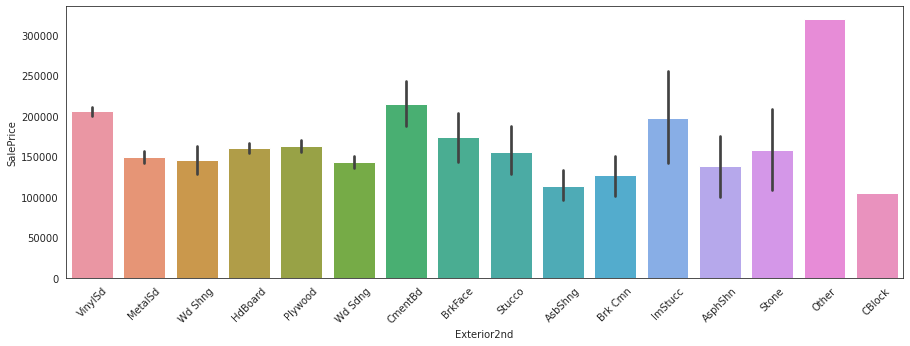

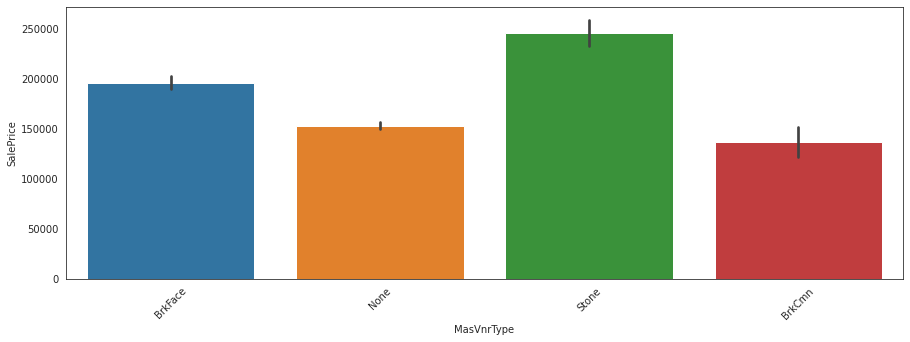

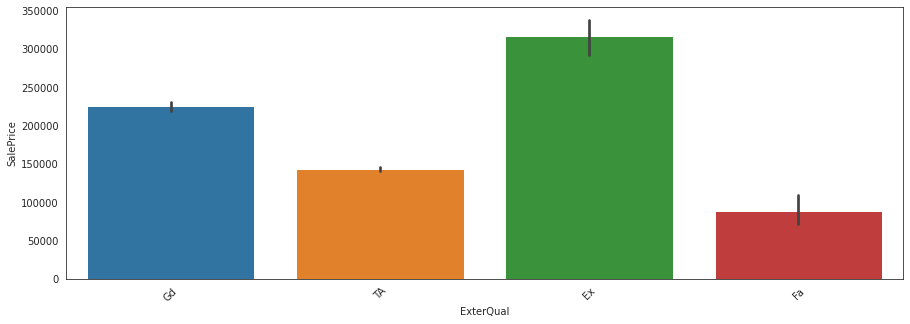

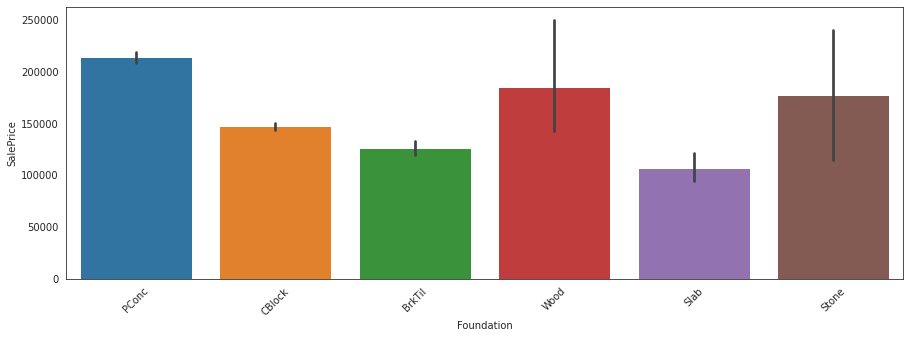

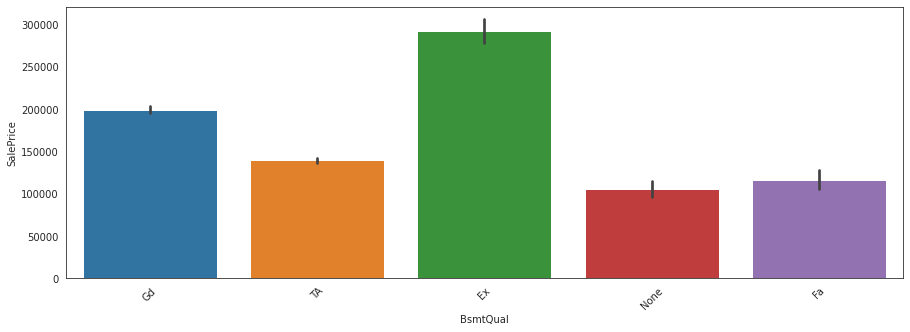

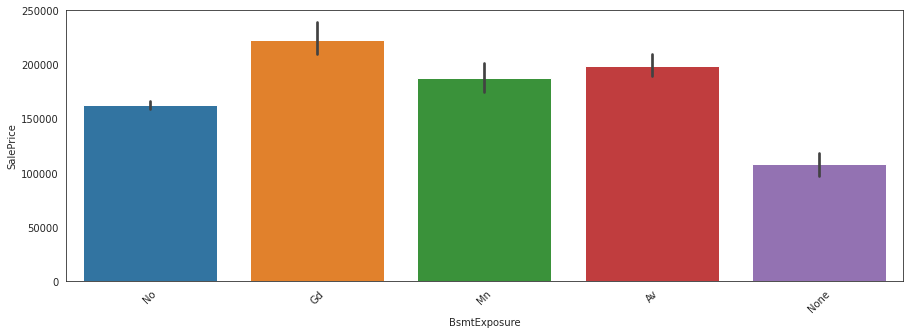

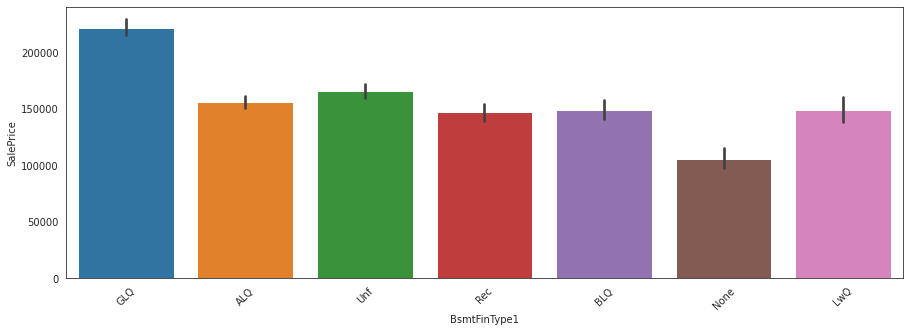

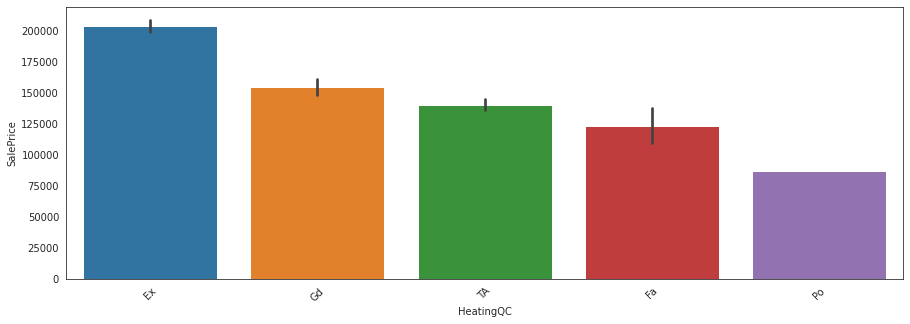

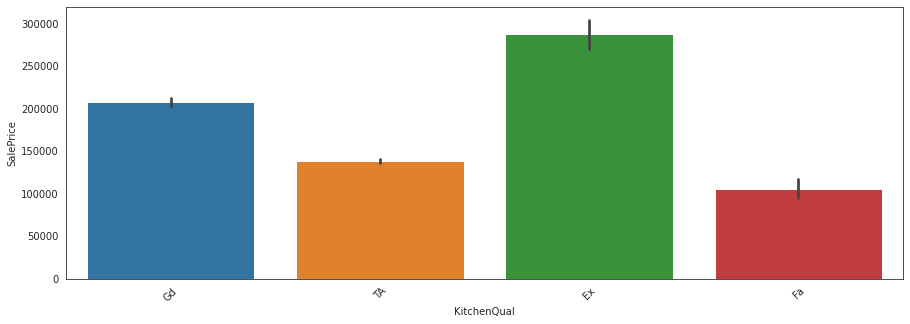

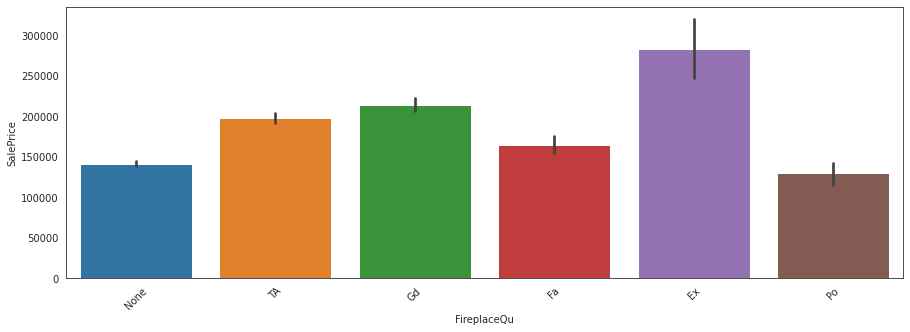

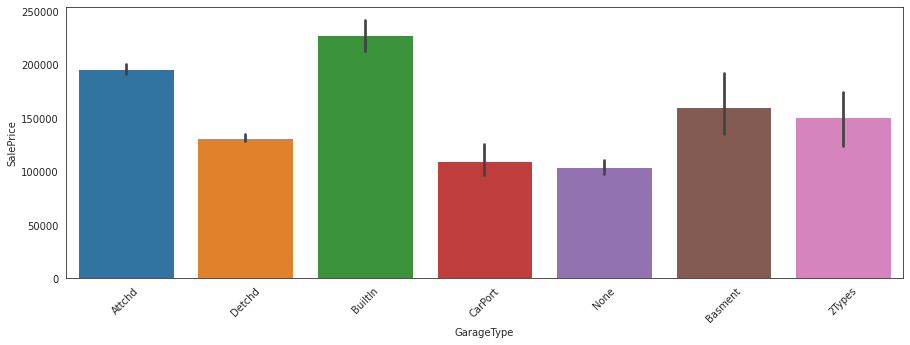

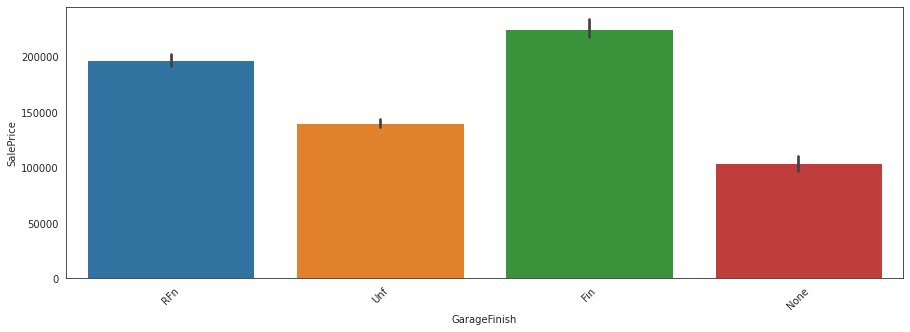

In [643]:
for i in range(len(obj_cols)):
  x = data[obj_cols[i]]
  y = data['SalePrice']
  plt.figure(i)
  plt.figure(figsize = (15,5))
  plt.xticks(rotation = 45)
  sns.barplot(x=x,y=y,data = df)

- House with these two zoning classfication has higher salesprice compared to other zones
    - Floating Village Residential
    - Residential Low Density

- The houses with these shapes have high prices
    - Slightly irregular
    - Moderately Irregular

In [644]:
data.shape

(1386, 47)

## Step 4: Data Preparation


In [645]:
##For ordinals, let's assign them their respective sorting number.
data['dummy_LotShape'] = data['LotShape'].map({'IR3': 0,'IR2': 1,  'IR1': 2,'Reg': 3 })
data['dummy_ExterQual'] = data['ExterQual'].map({ 'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3,  'Gd': 4,'Ex': 5 })
data['dummy_BsmtQual'] = data['BsmtQual'].map({ 'None': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

data['dummy_BsmtExposure'] = data['BsmtExposure'].map({ 'None': 0, 'No': 1,'Mn': 2,'Av': 3,'Gd': 4  })
data['dummy_BsmtFinType1'] = data['BsmtFinType1'].map({ 'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5,'GLQ': 6 })
data['dummy_HeatingQC'] = data['HeatingQC'].map({'None': 0,'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4,'Ex': 5     })

data['dummy_KitchenQual'] = data['KitchenQual'].map({'None': 0,'Po': 1, 'Fa': 2, 'TA': 3 , 'Gd': 4,'Ex': 5})
data['dummy_FireplaceQu'] = data['FireplaceQu'].map({ 'None': 0,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5 })
data['dummy_GarageFinish'] = data['GarageFinish'].map({ 'None': 0 , 'Unf': 1, 'RFn': 2,'Fin': 3})
data['dummy_HouseStyle'] = data['HouseStyle'].map({'1Story':0,'1.5Unf':1,'1.5Fin': 2,'2Story': 3,'2.5Unf': 4, '2.5Fin': 5,'SFoyer': 6,  'SLvl': 7  })

data = data.drop(['HouseStyle','LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC','KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1)

data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageType,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,dummy_LotShape,dummy_ExterQual,dummy_BsmtQual,dummy_BsmtExposure,dummy_BsmtFinType1,dummy_HeatingQC,dummy_KitchenQual,dummy_FireplaceQu,dummy_GarageFinish,dummy_HouseStyle
0,60,RL,65.0,8450,Inside,CollgCr,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,PConc,706,0,150,856,0,1710,1,0,2,1,3,1,0,Attchd,2,0,61,0,0,0,0,0,208500,3,4,4,1,6,5,4,0,2,3
1,20,RL,80.0,9600,FR2,Veenker,6,8,Gable,MetalSd,MetalSd,None,0.0,CBlock,978,0,284,1262,0,1262,0,1,2,0,3,1,1,Attchd,2,298,0,0,0,0,0,0,181500,3,3,4,4,5,5,3,3,2,0
2,60,RL,68.0,11250,Inside,CollgCr,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,PConc,486,0,434,920,0,1786,1,0,2,1,3,1,1,Attchd,2,0,42,0,0,0,0,0,223500,2,4,4,2,6,5,4,3,2,3
3,70,RL,60.0,9550,Corner,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,BrkTil,216,0,540,756,0,1717,1,0,1,0,3,1,1,Detchd,3,0,35,272,0,0,0,0,140000,2,3,3,1,5,4,4,4,1,3
4,60,RL,84.0,14260,FR2,NoRidge,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,PConc,655,0,490,1145,0,2198,1,0,2,1,4,1,1,Attchd,3,192,84,0,0,0,0,0,250000,2,4,4,3,6,5,4,3,2,3


In [646]:
data.MSSubClass.value_counts()

20     505
60     274
50     141
120    84 
30     68 
160    62 
70     57 
80     57 
90     52 
190    28 
85     20 
45     12 
75     12 
180    10 
40     4  
Name: MSSubClass, dtype: int64

In [647]:
#Creating dummy variables for categorical nominal variables

dummy_MSSubClass = pd.get_dummies(data['MSSubClass'], prefix='MSSubClass', drop_first = True)
data = pd.concat([data, dummy_MSSubClass], axis = 1)

dummy_MSZoning = pd.get_dummies(data['MSZoning'], prefix='MSZoning', drop_first = True)
data = pd.concat([data, dummy_MSZoning], axis = 1)

dummy_LotConfig = pd.get_dummies(data['LotConfig'], prefix='LotConfig', drop_first = True)
data = pd.concat([data, dummy_LotConfig], axis = 1)

dummy_Neighborhood = pd.get_dummies(data['Neighborhood'], prefix='Neighborhood', drop_first = True)
data = pd.concat([data, dummy_Neighborhood], axis = 1)

dummy_RoofStyle = pd.get_dummies(data['RoofStyle'], prefix='RoofStyle', drop_first = True)
data = pd.concat([data, dummy_RoofStyle], axis = 1)

dummy_Exterior1st = pd.get_dummies(data['Exterior1st'], prefix='Exterior1st', drop_first = True)
data = pd.concat([data, dummy_Exterior1st], axis = 1)

dummy_Exterior2nd = pd.get_dummies(data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
data = pd.concat([data, dummy_Exterior2nd], axis = 1)

dummy_MasVnrType = pd.get_dummies(data['MasVnrType'], prefix='MasVnrType', drop_first = True)
data = pd.concat([data, dummy_MasVnrType], axis = 1)

dummy_Foundation = pd.get_dummies(data['Foundation'], prefix='Foundation', drop_first = True)
data = pd.concat([data, dummy_Foundation], axis = 1)

dummy_GarageType = pd.get_dummies(data['GarageType'], prefix='GarageType', drop_first = True)
data = pd.concat([data, dummy_GarageType], axis = 1)

data = data.drop(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'RoofStyle', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType' ], axis=1)

data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,dummy_LotShape,dummy_ExterQual,dummy_BsmtQual,dummy_BsmtExposure,dummy_BsmtFinType1,dummy_HeatingQC,dummy_KitchenQual,dummy_FireplaceQu,dummy_GarageFinish,dummy_HouseStyle,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,...,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,65.0,8450,7,5,196.0,706,0,150,856,0,1710,1,0,2,1,3,1,0,2,0,61,0,0,0,0,0,208500,3,4,4,1,6,5,4,0,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,80.0,9600,6,8,0.0,978,0,284,1262,0,1262,0,1,2,0,3,1,1,2,298,0,0,0,0,0,0,181500,3,3,4,4,5,5,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,162.0,486,0,434,920,0,1786,1,0,2,1,3,1,1,2,0,42,0,0,0,0,0,223500,2,4,4,2,6,5,4,3,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,60.0,9550,7,5,0.0,216,0,540,756,0,1717,1,0,1,0,3,1,1,3,0,35,272,0,0,0,0,140000,2,3,3,1,5,4,4,4,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,8,5,350.0,655,0,490,1145,0,2198,1,0,2,1,4,1,1,3,192,84,0,0,0,0,0,250000,2,4,4,3,6,5,4,3,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [648]:
data.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,dummy_LotShape,dummy_ExterQual,dummy_BsmtQual,dummy_BsmtExposure,dummy_BsmtFinType1,dummy_HeatingQC,dummy_KitchenQual,dummy_FireplaceQu,dummy_GarageFinish,dummy_HouseStyle,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,...,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,...,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,69.132756,9617.339827,6.025253,5.579365,93.544733,421.297980,43.973304,557.287157,1022.558442,5.743867,1474.387446,0.411977,0.057720,1.545455,0.373737,2.854978,1.048341,0.585137,1.738817,85.715007,41.162338,22.645022,3.591631,14.032468,1.626984,43.480519,173665.735931,2.613276,3.368687,3.454545,1.582251,3.506494,4.137085,3.486291,1.754690,1.689755,1.658730,0.049062,0.002886,0.008658,0.101732,0.197691,0.041126,0.008658,0.041126,0.014430,0.037518,0.060606,0.044733,0.007215,...,0.024531,0.007215,0.795815,0.007937,0.183983,0.005051,0.001443,0.000722,0.001443,0.033189,0.000722,0.037518,0.154401,0.000722,0.157287,0.070707,0.001443,0.017316,0.356421,0.135642,0.018038,0.002165,0.005051,0.015873,0.000722,0.037518,0.142857,0.006494,0.152958,0.000722,0.093795,0.003608,0.018038,0.348485,0.132035,0.025253,0.303752,0.603175,0.082973,0.439394,0.436508,0.017316,0.003608,0.002165,0.591631,0.013709,0.054834,0.006494,0.272006,0.056999
std,20.757697,4101.697321,1.311465,1.114969,160.907301,412.993356,155.133072,429.373573,380.475086,47.510851,466.148751,0.511077,0.239407,0.537165,0.501553,0.806942,0.224431,0.630428,0.738548,110.069090,55.050869,61.987511,30.079472,52.633393,30.394710,507

## Step 5: Train Test Split


In [649]:
# splitting the data to train and test in respective ratio 8:2
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [650]:
binaryColumns = [col for col in data if np.isin(data[col].unique(), [0, 1]).all()]
allColumns = list(data.columns)
nonBinaryCols = list(set(binaryColumns) ^ set(allColumns))

In [651]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
data_train[nonBinaryCols] = scaler.fit_transform(data_train[nonBinaryCols])
data_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,dummy_LotShape,dummy_ExterQual,dummy_BsmtQual,dummy_BsmtExposure,dummy_BsmtFinType1,dummy_HeatingQC,dummy_KitchenQual,dummy_FireplaceQu,dummy_GarageFinish,dummy_HouseStyle,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,...,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,...,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.0,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,0.162792,0.245449,0.559065,0.573330,0.059669,0.245479,0.030670,0.275044,0.485440,0.010617,0.360302,0.138688,0.027527,0.515945,0.186372,0.354806,0.348375,0.194043,0.436146,0.180606,0.158176,0.057140,0.007311,0.033904,0.001705,0.002757,0.384137,0.872142,0.457280,0.692960,0.394856,0.584838,0.788809,0.500903,0.348736,0.564681,0.237622,0.049639,0.003610,0.009025,0.100181,0.195848,0.041516,0.008123,0.041516,0.014440,0.037004,0.065884,0.045126,0.009025,...,0.019856,0.009025,0.805054,0.006318,0.175090,0.006318,0.001805,0.0,0.001805,0.034296,0.000903,0.041516,0.147112,0.000903,0.156137,0.074007,0.001805,0.016245,0.360108,0.130866,0.019856,0.001805,0.003610,0.014440,0.000903,0.041516,0.134477,0.007220,0.154332,0.000903,0.099278,0.002708,0.017148,0.352888,0.128159,0.026173,0.304152,0.599278,0.085740,0.435018,0.446751,0.017148,0.003610,0.002708,0.594765,0.015343,0.053249,0.006318,0.269856,0.056859
std,0.071039,0.117557,0.147541,0.141507,0.102608,0.245006,0.110025,0.211545,0.178835,0.088232,0.147425,0.171547,0.117987,0.178787,0.251040,0.100675,0.072067,0.210038,0.183856,0.233393,0.208046,0.156257,0.063860,0.128745,0.040177,0.035723,0.180884,0.185270,0.184407,0.169342,0.256357,0.351539,

In [652]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables for test set
data_test[nonBinaryCols] = scaler.fit_transform(data_test[nonBinaryCols])

In [653]:
# splitting train data to x_train(predictor variable) and y_train (target variable)
X_train = data_train.drop('SalePrice',axis=1)
y_train = data_train['SalePrice']


# splitting test data to X_test(predictor variable) and Y_test (target variable)
X_test = data_test.drop('SalePrice',axis=1)
y_test = data_test['SalePrice']


In [654]:
data.shape

(1386, 131)

### Recursive Feature Elimination (RFE)


In [655]:
# Using RFE method to identify top 50 params

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=40,step=1) 
rfe = rfe.fit(X_train, y_train)

In [656]:
#top 50 params
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageCars', 'OpenPorchSF', '3SsnPorch', 'PoolArea',
       'dummy_ExterQual', 'dummy_BsmtQual', 'dummy_BsmtExposure',
       'dummy_KitchenQual', 'dummy_GarageFinish', 'MSSubClass_120',
       'MSSubClass_160', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CemntBd', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd',
       'Foundation_Slab', 'Foundation_Wood', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_None'],
      dtype='object')

In [657]:
def VIFCalculation(df_data):
    vif = pd.DataFrame()
    vif['Features'] = df_data.columns
    vif['VIF'] = [variance_inflation_factor(df_data.values, i) for i in range(df_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [658]:
#selecting columns basis of RFE method
X_train_rfe = X_train[col]
VIFCalculation(X_train_rfe)

,Features,VIF
34,GarageType_Attchd,57.15
15,dummy_BsmtQual,57.02
1,OverallQual,54.39
9,KitchenAbvGr,29.34
8,BedroomAbvGr,25.15
38,GarageType_Detchd,24.06
31,Exterior2nd_CmentBd,23.93
29,Exterior1st_CemntBd,23.75
7,GrLivArea,21.29
2,OverallCond,21.05


In [660]:
X_test =  X_test[X_train.columns]


## Step 6: Model Building and Evaluation


### Lasso Regression


In [661]:
# Lasso Regression Model. 
lasso = Lasso()

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
params_1 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [662]:
# mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.037240,-0.041818,1
1,0.001,-0.044236,-0.046615,2
2,0.01,-0.082237,-0.084066,3
25,100,-0.140228,-0.140548,4
24,50,-0.140228,-0.140548,4
23,20,-0.140228,-0.140548,4
22,10.0,-0.140228,-0.140548,4
21,9.0,-0.140228,-0.140548,4
20,8.0,-0.140228,-0.140548,4
19,7.0,-0.140228,-0.140548,4


In [663]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [665]:
# fitting the model with lambda = 0.0001

lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients: ",lasso.coef_)

Intercept:  -0.20255238400406367
Coefficients:  [ 0.02135696  0.05054913  0.2165808   0.10170152  0.06243756  0.07330912
  0.0085764  -0.          0.08705566 -0.02860352  0.37782026  0.01833923
 -0.          0.01670781  0.01372082 -0.01558112 -0.07540766  0.02518698
  0.09764924  0.0223871   0.02972244 -0.          0.02295337  0.01818055
  0.         -0.         -0.          0.05949223  0.05953747  0.04211072
  0.00447552  0.00692844  0.04160944  0.          0.02182149 -0.03282852
 -0.00485071  0.         -0.         -0.00718222  0.01214859 -0.
 -0.          0.02444253 -0.         -0.01543187 -0.04208051 -0.05388316
 -0.         -0.03589689  0.02248797  0.01200664  0.02070949 -0.
  0.01332045 -0.01180287 -0.          0.          0.          0.03632658
  0.01610394  0.         -0.00327362  0.06248487 -0.01707388 -0.01173304
 -0.00704244 -0.01037583 -0.01255821 -0.01837296  0.00567865 -0.02374335
  0.044168    0.08614432 -0.02113533 -0.02265615 -0.01493433 -0.
  0.03139842  0.10786183  0

In [666]:
# train and test prediction using lasso
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

# R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

# mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

# Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

# Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Train Set:")
print("r2 score:",r2_score_lasso_train)
print("nMSE score:",MSE_lasso_train)
print("MAE score:",MAE_lasso_train)
print("RMSE score:",RMSE_lasso_train)

print("Test Set:")
print("r2 score:",r2_score_lasso_test)
print("nMSE score:",MSE_lasso_test)
print("MAE score:",MAE_lasso_test)
print("RMSE score:",RMSE_lasso_test)

Train Set:
r2 score: 0.9155105695483937
nMSE score: 0.002761931778179996
MAE score: 0.037640271578771464
RMSE score: 0.052554084314922624
Test Set:
r2 score: 0.864350245593547
nMSE score: 0.00445401382051944
MAE score: 0.05103185476079498
RMSE score: 0.06673839839642123


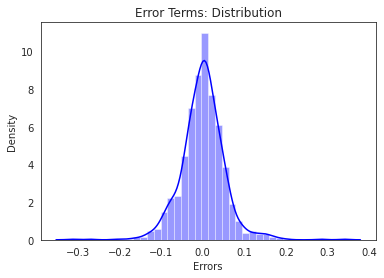

In [667]:
# Plot the histogram of the error terms
#residuals of lasso data model
res1 = (y_train - y_pred_train_l)     
sns.distplot(res1 , bins = 40, color='b')
plt.title('Error Terms: Distribution', fontsize = 12)               
plt.xlabel('Errors') 
plt.show()

- Normally distributed

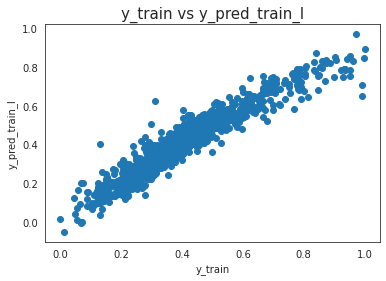

In [668]:
# Plotting y_train and y_train_pred to check the errors have no patterns
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontsize = 15)           
plt.xlabel('y_train')              
plt.ylabel('y_pred_train_l')
plt.show()

- errors are not showing any patters

In [691]:

lasso_data = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Abs_Coefficient_Ridge':abs(ridge.coef_.round(4))})
# Sorting coefficient in descending order of absolute values and reset index
lasso_data = lasso_data.sort_values(by='Abs_Coefficient_Ridge', ascending=False)
lasso_data.head(10)

,Features,Coefficient,Abs_Coefficient_Ridge
10,GrLivArea,0.3778,0.3217
2,OverallQual,0.2166,0.1932
79,Neighborhood_StoneBr,0.1079,0.1040
18,GarageCars,0.0976,0.0993
3,OverallCond,0.1017,0.0967
8,TotalBsmtSF,0.0871,0.0879
121,Foundation_Slab,0.0782,0.0851
5,BsmtFinSF1,0.0733,0.0791
73,Neighborhood_NridgHt,0.0861,0.0758
4,MasVnrArea,0.0624,0.0688


### Ridge Regression


In [669]:
#lamdas
params_2 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

##Cross-Validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [670]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 1.0}


In [686]:
# fitting the model with lambda = 1.0

ridge = Ridge(alpha=1.0)
        
ridge.fit(X_train, y_train) 
print("Intercept: ",ridge.intercept_)
print("Coefficients: ",ridge.coef_)

Intercept:  -0.25732115552743945
Coefficients:  [ 4.60571533e-02  6.38328537e-02  1.93222107e-01  9.67343133e-02
  6.87855742e-02  7.91248778e-02  2.27961052e-02  8.59245733e-03
  8.78565969e-02 -3.12574300e-02  3.21676452e-01  2.31676410e-02
 -2.10845928e-04  4.07590738e-02  2.25998557e-02 -2.16137662e-02
 -6.45452070e-02  2.97723028e-02  9.92899535e-02  2.31229926e-02
  3.18150496e-02  5.27777397e-04  4.50396447e-02  2.19108207e-02
  3.91221658e-02 -5.93403170e-04  2.78316083e-03  5.50222427e-02
  6.10816060e-02  4.18867539e-02  4.83659706e-03  1.06937060e-02
  4.36478163e-02 -8.47812580e-04  1.97435112e-02 -2.52311679e-02
 -1.39462011e-02  5.26772419e-03 -1.31799792e-02 -7.62585886e-03
  1.44666968e-02  2.25140359e-03 -2.01442843e-03  1.94711014e-02
 -1.04633368e-02 -2.18987535e-02 -4.89108410e-02 -6.23558368e-02
 -1.51141578e-02 -3.95275220e-02  4.51014378e-02  4.68809212e-02
  4.08956307e-02  2.38417475e-02  1.60464291e-02 -1.82873756e-02
 -2.30704110e-02 -6.44614636e-04  9.037863

In [687]:
# train and test prediction using ridge
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

# R2 score for ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

# mean squared error (MSE) for ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

# Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

# Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)

print("Train Set:")
print("r2 score:",r2_score_ridge_train)
print("nMSE score:",MSE_ridge_train)
print("MAE score:",MAE_ridge_train)
print("RMSE score:",RMSE_ridge_train)

print("Test Set:")
print("r2 score:",r2_score_ridge_test)
print("nMSE score:",MSE_ridge_test)
print("MAE score:",MAE_ridge_test)
print("RMSE score:",RMSE_ridge_test)

Train Set:
r2 score: 0.9180277645392738
nMSE score: 0.002679645499292493
MAE score: 0.037078924227108304
RMSE score: 0.05176529241965598
Test Set:
r2 score: 0.8665949432909154
nMSE score: 0.0043803099305956186
MAE score: 0.05049488387016028
RMSE score: 0.06618390990713391


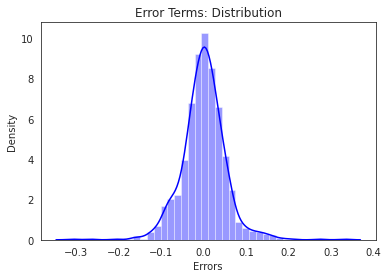

In [688]:
# Plot the histogram of the error terms
#residuals of lasso data model
res1 = (y_train - y_pred_train_r)     
sns.distplot(res1 , bins = 40, color='b')
plt.title('Error Terms: Distribution', fontsize = 12)               
plt.xlabel('Errors') 
plt.show()

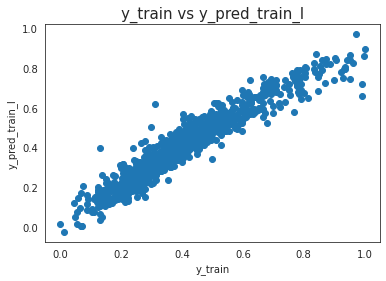

In [689]:
# Plotting y_train and y_train_pred to check the errors have no patterns
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_l', fontsize = 15)           
plt.xlabel('y_train')              
plt.ylabel('y_pred_train_l')
plt.show()

In [690]:

ridge_data = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge':abs(ridge.coef_.round(4))})
# Sorting coefficient in descending order of absolute values and reset index
ridge_data = ridge_data.sort_values(by='Abs_Coefficient_Ridge', ascending=False)
ridge_data.head(10)

,Features,Coefficient,Abs_Coefficient_Ridge
10,GrLivArea,0.3217,0.3217
2,OverallQual,0.1932,0.1932
79,Neighborhood_StoneBr,0.1040,0.1040
18,GarageCars,0.0993,0.0993
3,OverallCond,0.0967,0.0967
8,TotalBsmtSF,0.0879,0.0879
121,Foundation_Slab,0.0851,0.0851
5,BsmtFinSF1,0.0791,0.0791
73,Neighborhood_NridgHt,0.0758,0.0758
4,MasVnrArea,0.0688,0.0688


Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ans : 

- alpha for ridge = 1.0 
- alpha for ridge = 0.0001 

In [676]:
# if double the alpha for ridge
# fitting the model with lambda = 2.0

ridge = Ridge(alpha=2.0)
        
ridge.fit(X_train, y_train) 
print("Intercept: ",ridge.intercept_)
print("Coefficients: ",ridge.coef_)

Intercept:  -0.22844774829907827
Coefficients:  [ 4.44719953e-02  6.34726033e-02  1.82306001e-01  9.27315466e-02
  6.42474648e-02  8.08673344e-02  2.35947124e-02  1.18426515e-02
  9.29666683e-02 -2.32179672e-02  2.77147046e-01  2.19906482e-02
 -1.84789372e-03  4.92225704e-02  2.63281538e-02 -7.06265024e-03
 -4.74765277e-02  3.10073005e-02  9.80390015e-02  2.34445617e-02
  3.30102438e-02  4.35029084e-04  3.66187138e-02  2.10982722e-02
  2.78103021e-02 -5.99190928e-04  1.76180196e-03  5.89143556e-02
  5.57154968e-02  4.26001022e-02  5.69710530e-03  1.23584619e-02
  4.80764158e-02  2.91712116e-03  2.01479635e-02 -2.20656221e-02
 -1.44143165e-02  4.94969707e-03 -1.11584544e-02 -3.89681504e-03
  1.82118213e-02  8.41268350e-03  3.50928564e-03  1.77766863e-02
 -1.22893508e-02 -2.17243648e-02 -4.68835820e-02 -5.54449559e-02
 -1.31499558e-02 -3.70141285e-02  3.29350727e-02  3.38188716e-02
  3.11514559e-02  1.31260427e-02  1.57722528e-02 -1.83443680e-02
 -2.03844095e-02 -7.50907018e-04  6.444909

In [677]:
# train and test prediction using ridge
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

# R2 score for ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

# mean squared error (MSE) for ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

# Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

# Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)

print("Train Set:")
print("r2 score:",r2_score_ridge_train)
print("nMSE score:",MSE_ridge_train)
print("MAE score:",MAE_ridge_train)
print("RMSE score:",RMSE_ridge_train)

print("Test Set:")
print("r2 score:",r2_score_ridge_test)
print("nMSE score:",MSE_ridge_test)
print("MAE score:",MAE_ridge_test)
print("RMSE score:",RMSE_ridge_test)

Train Set:
r2 score: 0.9159793056621017
nMSE score: 0.0027466089483170067
MAE score: 0.03754050700914243
RMSE score: 0.05240810002582622
Test Set:
r2 score: 0.8693689325530792
nMSE score: 0.004289226931103931
MAE score: 0.0500345962440427
RMSE score: 0.06549218984813328


In [694]:

ridge_data = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge':abs(ridge.coef_.round(4))})
# Sorting coefficient in descending order of absolute values and reset index
ridge_data = ridge_data.sort_values(by='Abs_Coefficient_Ridge', ascending=False)
print('                Top 10 params for ridge')
ridge_data.head(10)

                Top 10 params for ridge


,Features,Coefficient,Abs_Coefficient_Ridge
10,GrLivArea,0.3217,0.3217
2,OverallQual,0.1932,0.1932
79,Neighborhood_StoneBr,0.1040,0.1040
18,GarageCars,0.0993,0.0993
3,OverallCond,0.0967,0.0967
8,TotalBsmtSF,0.0879,0.0879
121,Foundation_Slab,0.0851,0.0851
5,BsmtFinSF1,0.0791,0.0791
73,Neighborhood_NridgHt,0.0758,0.0758
4,MasVnrArea,0.0688,0.0688


In [707]:

# fitting the model with lambda = 0.0002

lasso = Lasso(alpha=0.0002)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients: ",lasso.coef_)

Intercept:  -0.2007817314568205
Coefficients:  [ 0.00356983  0.05059161  0.22714536  0.09724208  0.04830916  0.07694386
  0.0028605  -0.          0.09254577 -0.01335153  0.36326994  0.01431395
 -0.          0.0106562   0.01241596 -0.         -0.04460565  0.02116828
  0.09466716  0.02228138  0.02908122 -0.          0.          0.01402837
  0.         -0.         -0.          0.06466465  0.05005189  0.04256195
  0.00385629  0.00823736  0.04519989  0.00396041  0.02189195 -0.02725874
 -0.00063131 -0.         -0.         -0.00527252  0.01336165  0.
 -0.          0.01680542 -0.         -0.01775966 -0.03598009 -0.0430883
 -0.         -0.03407054  0.00892869  0.          0.01330765 -0.0103618
  0.01072219 -0.00763536 -0.          0.          0.          0.02093095
  0.01832574  0.         -0.          0.06275528 -0.01103476 -0.00604762
 -0.         -0.         -0.00561502 -0.01206012  0.         -0.01728592
  0.04431028  0.08585562 -0.01584303 -0.01767416 -0.00876813  0.
  0.03566641  0.100224

In [708]:
# train and test prediction using lasso
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

# R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

# mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

# Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

# Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("Train Set:")
print("r2 score:",r2_score_lasso_train)
print("nMSE score:",MSE_lasso_train)
print("MAE score:",MAE_lasso_train)
print("RMSE score:",RMSE_lasso_train)

print("Test Set:")
print("r2 score:",r2_score_lasso_test)
print("nMSE score:",MSE_lasso_test)
print("MAE score:",MAE_lasso_test)
print("RMSE score:",RMSE_lasso_test)

Train Set:
r2 score: 0.9118476331604292
nMSE score: 0.002881671967660454
MAE score: 0.03831110407974733
RMSE score: 0.053681206838710825
Test Set:
r2 score: 0.8615945273059268
nMSE score: 0.004544496898739704
MAE score: 0.051519009067206176
RMSE score: 0.06741288377409546


In [711]:

lasso_data = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Abs_Coefficient_Ridge':abs(lasso.coef_.round(4))})
# Sorting coefficient in descending order of absolute values and reset index
lasso_data = lasso_data.sort_values(by='Abs_Coefficient_Ridge', ascending=False)
print('                Top 10 params for lasso')
print(lasso_data.head(10))

                Top 10 params for lasso
                 Features  Coefficient  Abs_Coefficient_Ridge
10   GrLivArea             0.3633       0.3633               
2    OverallQual           0.2271       0.2271               
79   Neighborhood_StoneBr  0.1002       0.1002               
3    OverallCond           0.0972       0.0972               
18   GarageCars            0.0947       0.0947               
8    TotalBsmtSF           0.0925       0.0925               
73   Neighborhood_NridgHt  0.0859       0.0859               
5    BsmtFinSF1            0.0769       0.0769               
121  Foundation_Slab       0.0664       0.0664               
27   dummy_ExterQual       0.0647       0.0647               


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [695]:
X_train_new = X_train.drop(['GrLivArea','OverallQual','Neighborhood_StoneBr','GarageCars','OverallCond'],axis=1)

In [704]:
# Lasso Regression Model. 
lasso = Lasso()

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
params_1 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Cross-Validation

folds = 5
lasso_model_cv_2 = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv_2.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [705]:
# Printing the best hyperparameter alpha
print(lasso_model_cv_2.best_params_)

{'alpha': 0.0001}


In [713]:
# fitting the model with lambda = 0.0001

lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train_new, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients: ",lasso.coef_)

Intercept:  -0.1234464493916066
Coefficients:  [ 0.10235249  0.10243694  0.1017645   0.08210579  0.01370259 -0.
  0.21706773  0.          0.01395461 -0.0012065   0.13896183  0.06763287
  0.0471561  -0.03029622  0.04267241  0.02839756  0.03940996  0.
  0.02487918  0.01331759  0.          0.          0.00088805  0.10940909
  0.06367664  0.04752932  0.00075347  0.02613447  0.09546232  0.01463488
  0.02561371  0.01906855 -0.02569017  0.         -0.          0.01157541
  0.04094899  0.05117084  0.03424641  0.         -0.03255591 -0.01877136
 -0.03783001 -0.02971737 -0.         -0.01782687  0.          0.02408419
  0.01591014  0.00064742  0.0173176  -0.02489419 -0.00862505 -0.00156253
  0.          0.         -0.         -0.016882   -0.05037585  0.05827594
 -0.06437511 -0.07657711 -0.04318561 -0.11147376 -0.04934064 -0.0506245
 -0.         -0.04623819  0.03391759  0.048847   -0.03374877 -0.04595165
 -0.05523947 -0.03467936 -0.         -0.01170239  0.         -0.01454922
 -0.          0.00874

In [715]:

lasso_data = pd.DataFrame({'Features':X_train_new.columns, 'Coefficient':lasso.coef_.round(4), 
                         'Abs_Coefficient_Ridge':abs(lasso.coef_.round(4))})
# Sorting coefficient in descending order of absolute values and reset index
lasso_data = lasso_data.sort_values(by='Abs_Coefficient_Ridge', ascending=False)
print('                Top 5 params for lasso')
print(lasso_data.head(5))

                Top 5 params for lasso
                 Features  Coefficient  Abs_Coefficient_Ridge
6    TotalBsmtSF           0.2171       0.2171               
10   FullBath              0.1390       0.1390               
116  Foundation_Slab       0.1123       0.1123               
63   Neighborhood_MeadowV -0.1115       0.1115               
23   dummy_ExterQual       0.1094       0.1094               
